In [1]:
%load_ext autoreload

In [2]:
%reload_ext autoreload

# MODULE IMPORTS ----
# warning settings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data management
import pandas as pd
import numpy as np
import pickle

# Plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Stats functionality
from statsmodels.distributions.empirical_distribution import ECDF

from kabuki.analyze import _parents_to_random_posterior_sample

# HDDM
import hddm
from hddm.model_config import model_config
from hddm import plotting

In [3]:
# Metadata
nmcmc = 200
burn = 50
model = 'weibull'
n_trials_per_subject = 500
n_subjects = 3


# We allow the boundary conditions to vary
depends_on = {'a': ['c_one']}
# They will depend on a fictious column 'c_one' that specifies
# levels / conditions
conditions = {'c_one': ['low', 'medium', 'high']}

In [4]:
# test regressors only False
# add p_outliers to the generator !
data, full_parameter_dict = hddm.simulators.hddm_dataset_generators.simulator_h_c(data = None, 
                                                                                  n_subjects = n_subjects,
                                                                                  n_trials_per_subject = n_trials_per_subject,
                                                                                  model = model,
                                                                                  p_outlier = 0.00,
                                                                                  conditions = conditions, 
                                                                                  depends_on = depends_on, 
                                                                                  regression_models = None,
                                                                                  regression_covariates = None,
                                                                                  group_only_regressors = False,
                                                                                  group_only = None,
                                                                                  fixed_at_default = None)

depends_on is:  {'a': ['c_one']}


In [6]:
hddmnn_model = hddm.HDDMnn(data,
                           model = model,
                           informative = False,
                           depends_on = {'a': ['c_one']},
                           include = hddm.simulators.model_config[model]['hddm_include'], #is_group_model = True,
                           p_outlier = 0.05)

Includes supplied:  ['z', 'alpha', 'beta']


In [7]:
hddmnn_model.sample(nmcmc, burn = burn)

 [-----------------100%-----------------] 201 of 200 complete in 80.1 sec

In [39]:
hddmnn_model.nodes_db

,knode_name,stochastic,observed,subj,node,tag,depends,hidden,rt,response,...,t,theta,mean,std,2.5q,25q,50q,75q,97.5q,mc err
v0,v0,True,False,False,v0,(),[],False,NaN,NaN,...,NaN,NaN,1.81573,0.454764,0.526776,1.61078,1.87631,2.10534,2.46476,0.0506499
v0_std,v0_std,True,False,False,v0_std,(),[],False,NaN,NaN,...,NaN,NaN,0.683238,0.397264,0.114824,0.350086,0.618872,0.980492,1.43518,0.0405446
v0_tau,v0_tau,False,False,False,v0_tau,(),[],True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v0_subj.0,v0_subj,True,False,True,v0_subj.0,(),[subj_idx],False,NaN,NaN,...,NaN,NaN,1.96374,0.121372,1.72431,1.87293,1.95721,2.05177,2.23938,0.0113025
v0_subj.1,v0_subj,True,False,True,v0_subj.1,(),[subj_idx],False,NaN,NaN,...,NaN,NaN,1.73853,0.164415,1.48849,1.58213,1.75547,1.88448,2.03789,0.0152353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wfpt(medium.god).1,wfpt,False,True,False,wfpt(medium.god).1,"(medium, god)","[c_one, c_two, subj_idx]",False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wfpt(medium.god).2,wfpt,False,True,False,wfpt(medium.god).2,"(medium, god)","[c_one, c_two, subj_idx]",False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wfpt(medium.my).0,wfpt,False,True,False,wfpt(medium.my).0,"(medium, my)","[c_one, c_two, subj_idx]",False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wfpt(medium.my).1,wfpt,False,True,False,wfpt(medium.my).1,"(medium, my)","[c_one, c_two, subj_idx]",False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
', '.join(hddmnn_model.nodes_db.loc['wfpt(medium.god).1']['tag'])

'medium, god'

### Caterpillar plot

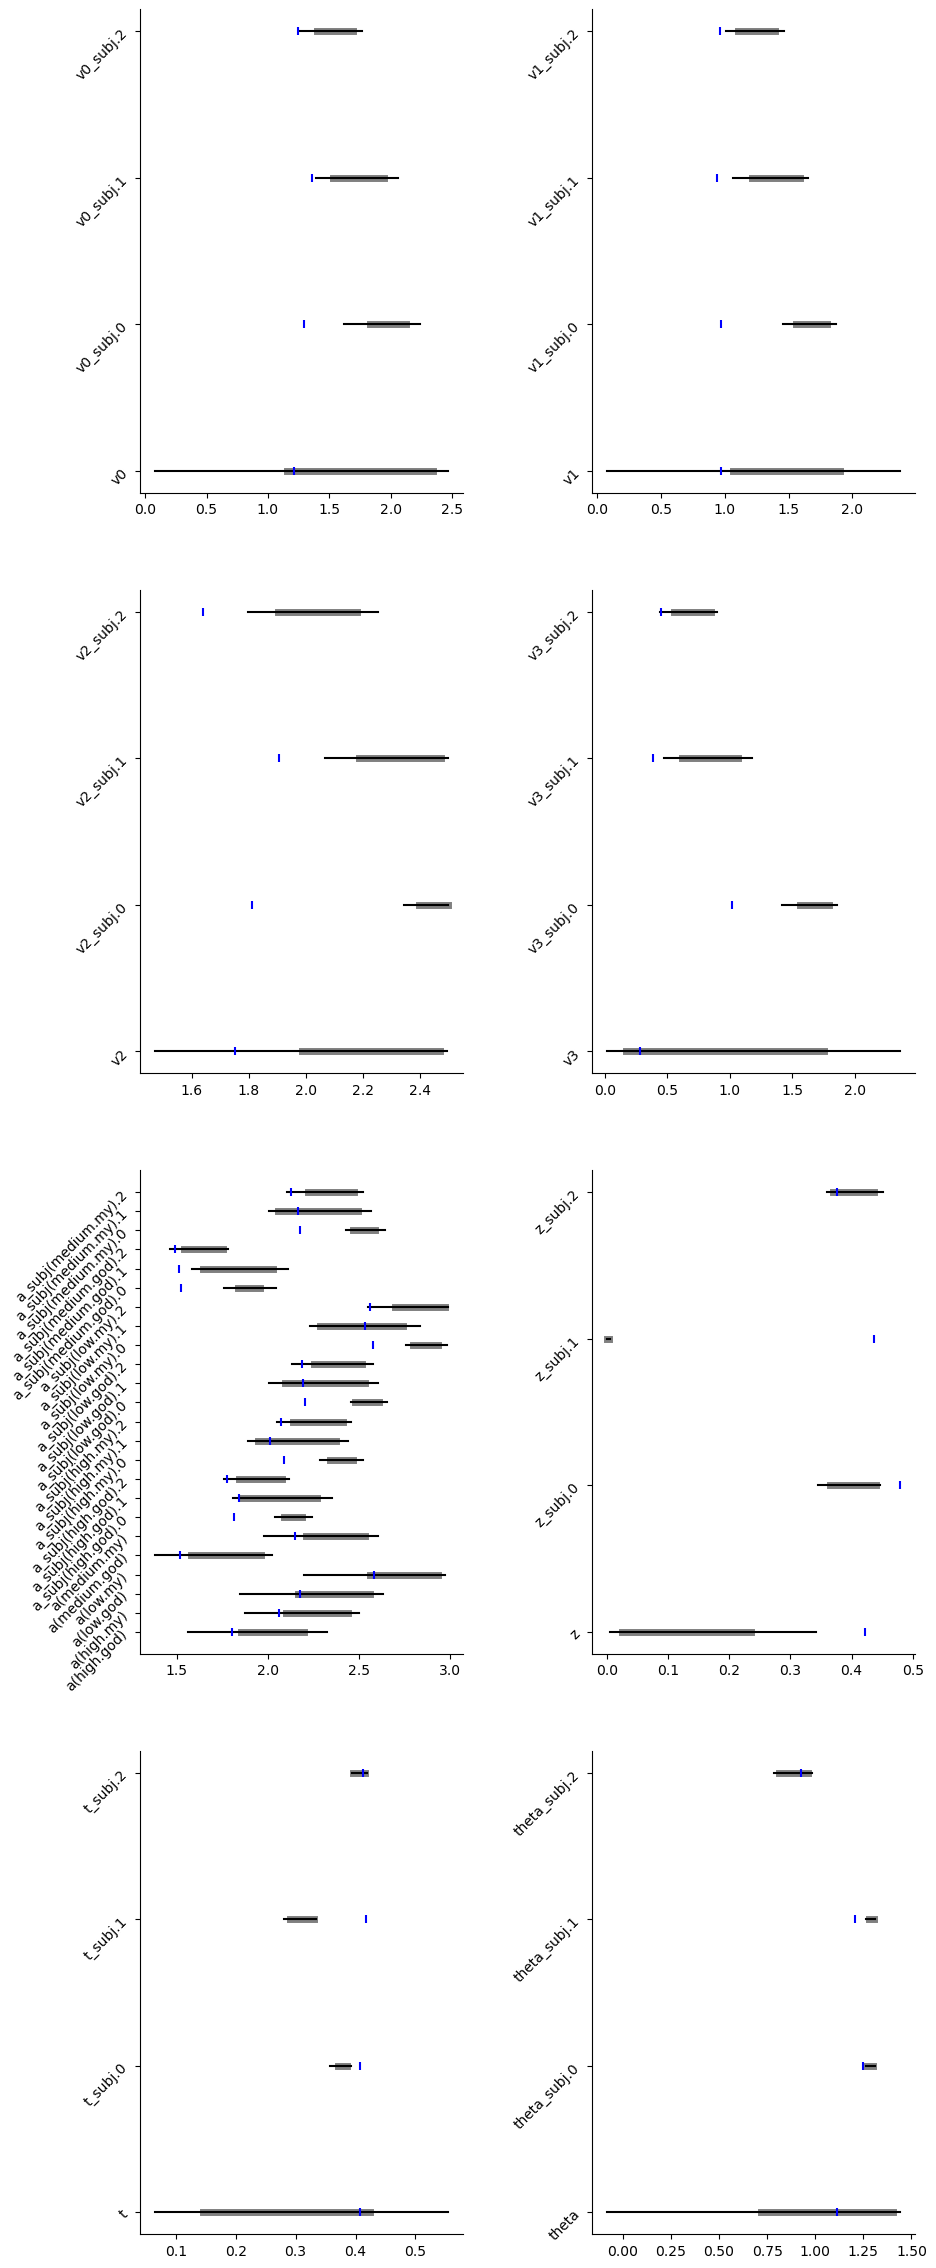

In [32]:
plotting_dev.caterpillar_plot(hddm_model = hddmnn_model, 
                              ground_truth_parameter_dict = full_parameter_dict,
                              figsize = (10, 25),
                              columns = 2)
                             # y_tick_size = 10)

plt.show()

In [8]:
#hddm.plotting import _plot_func_posterior_pdf_node_nn

hddm.plotting.plot_posterior_predictive(model = hddmnn_model, 
                                       plot_func = hddm.plotting._plot_func_posterior_pdf_node_nn,  
                                       value_range = np.arange(-4, 4, 0.01), 
                                       samples = 50,
                                       figsize = (12, 4),
                                       bin_size = 0.1,
                                       **{'linewidth': 0.5})

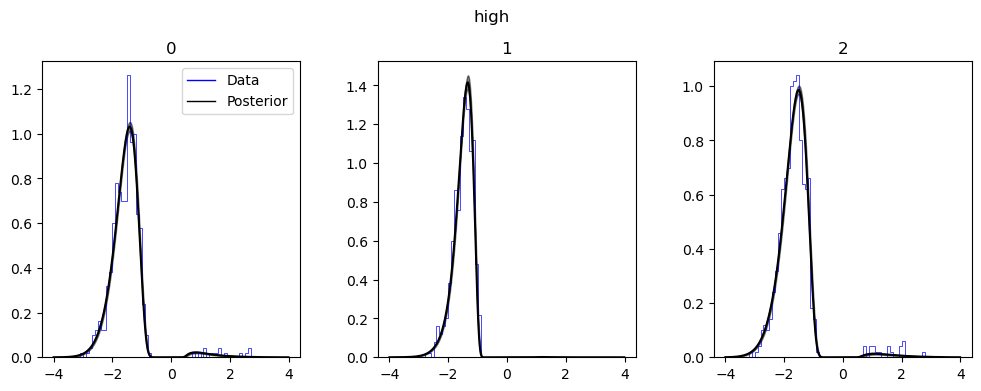

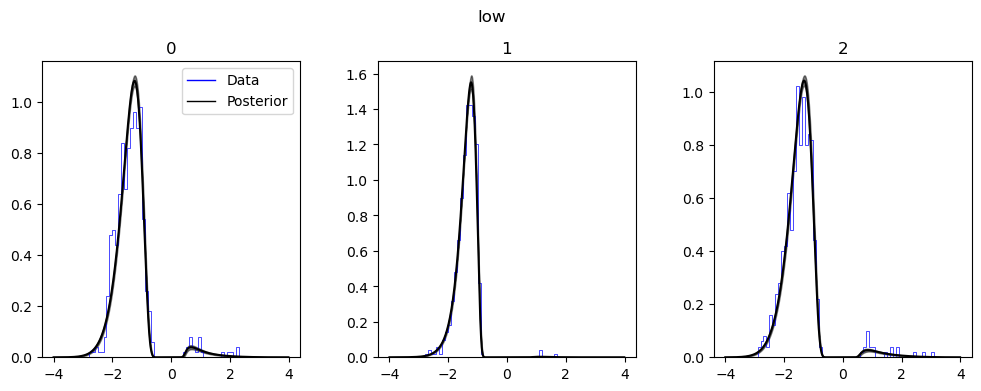

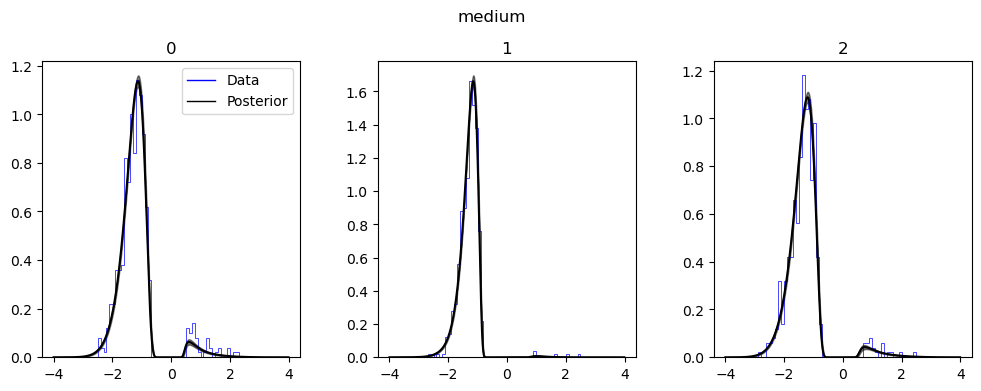

In [9]:
plt.show()

In [19]:
from hddm.plotting_dev import _plot_func_posterior_node_from_sim

plotting_dev.plot_posterior_predictive(model = hddmnn_model, 
                          plot_func = _plot_func_posterior_node_from_sim,  
                          value_range = np.arange(1, 4, 0.01), 
                                       samples = 50,
                                       figsize = (12, 4),
                                       bin_size = 0.1,
                                       **{'linewidth': 0.5,
                                          'add_posterior_mean': True,
                                          'add_posterior_uncertainty': False,
                                          'legend_loc': 'upper right',
                                          'legend_fontsize': 8})

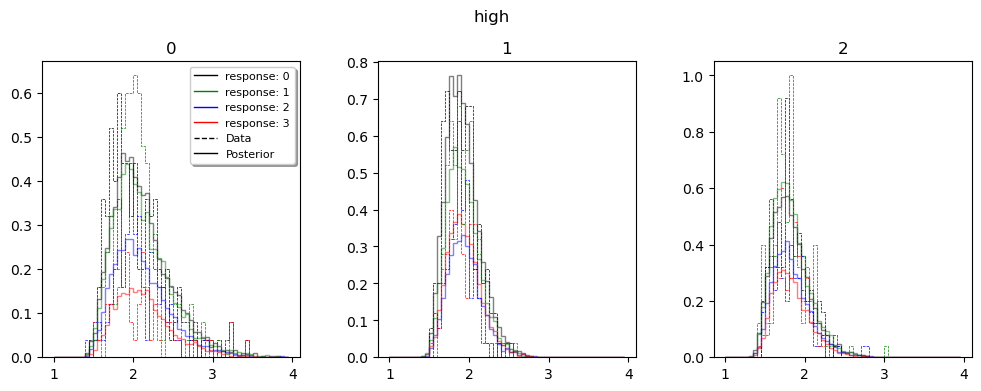

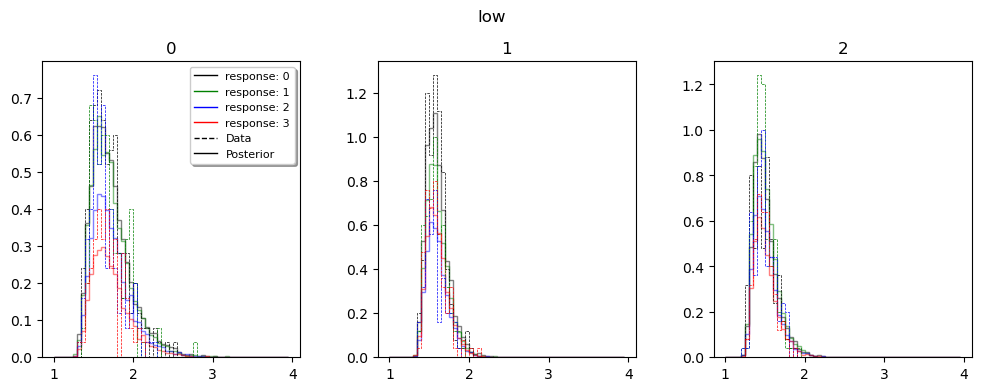

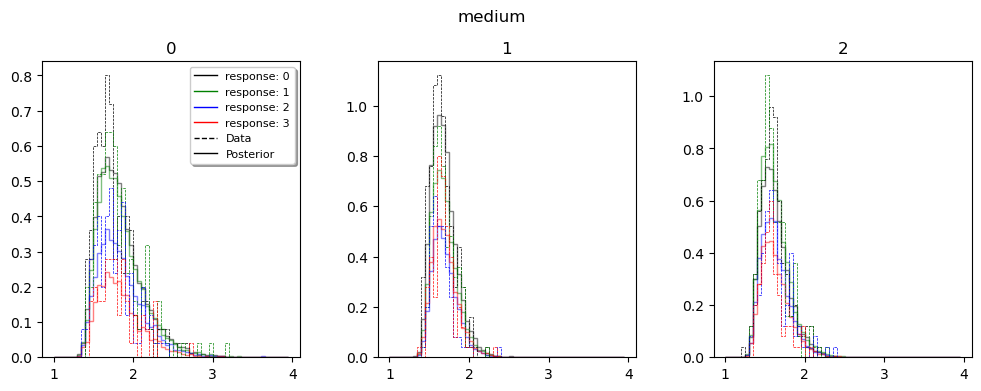

In [20]:
plt.show()

In [15]:
from hddm.plotting_dev import _plot_func_model

plotting_dev.plot_posterior_predictive(model = hddmnn_model, 
                                       plot_func = _plot_func_model, #value_range = np.arange(-5, 3, 0.01), 
                                       samples = 50,
                                       figsize = (12, 4),
                                       bin_size = 0.1,
                                       value_range = np.arange(-5, 3, 0.01),
                                       **{'linewidth': 0.5,
                                          'parameter_recovery_mode': True,
                                          'add_posterior_uncertainty': False,
                                          'linewidth_histogram': 2,
                                          'legend_fontsize': 10})

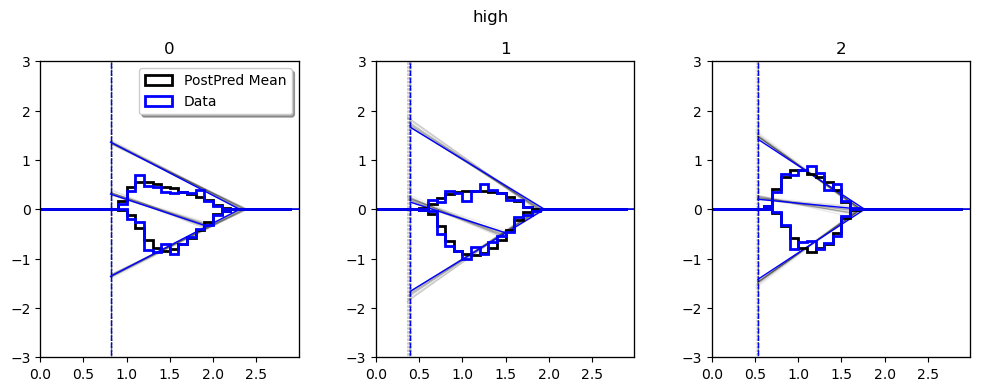

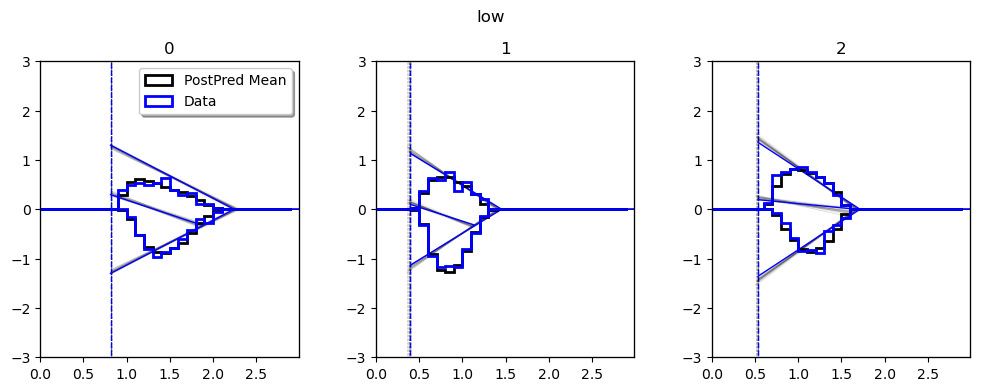

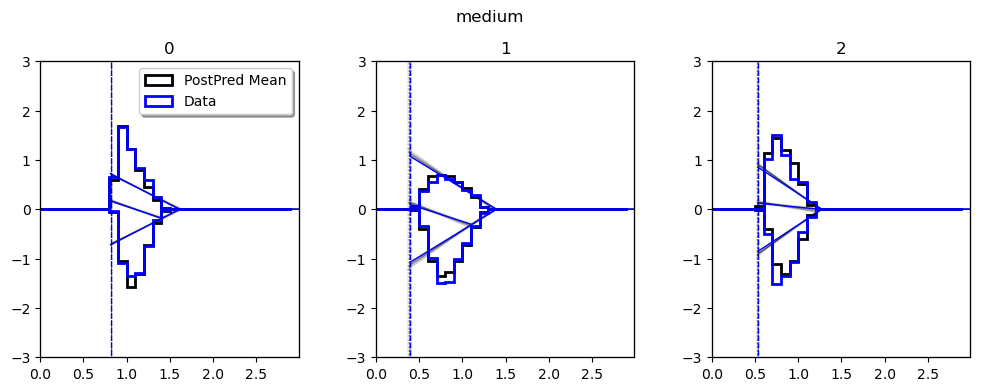

In [16]:
plt.show()

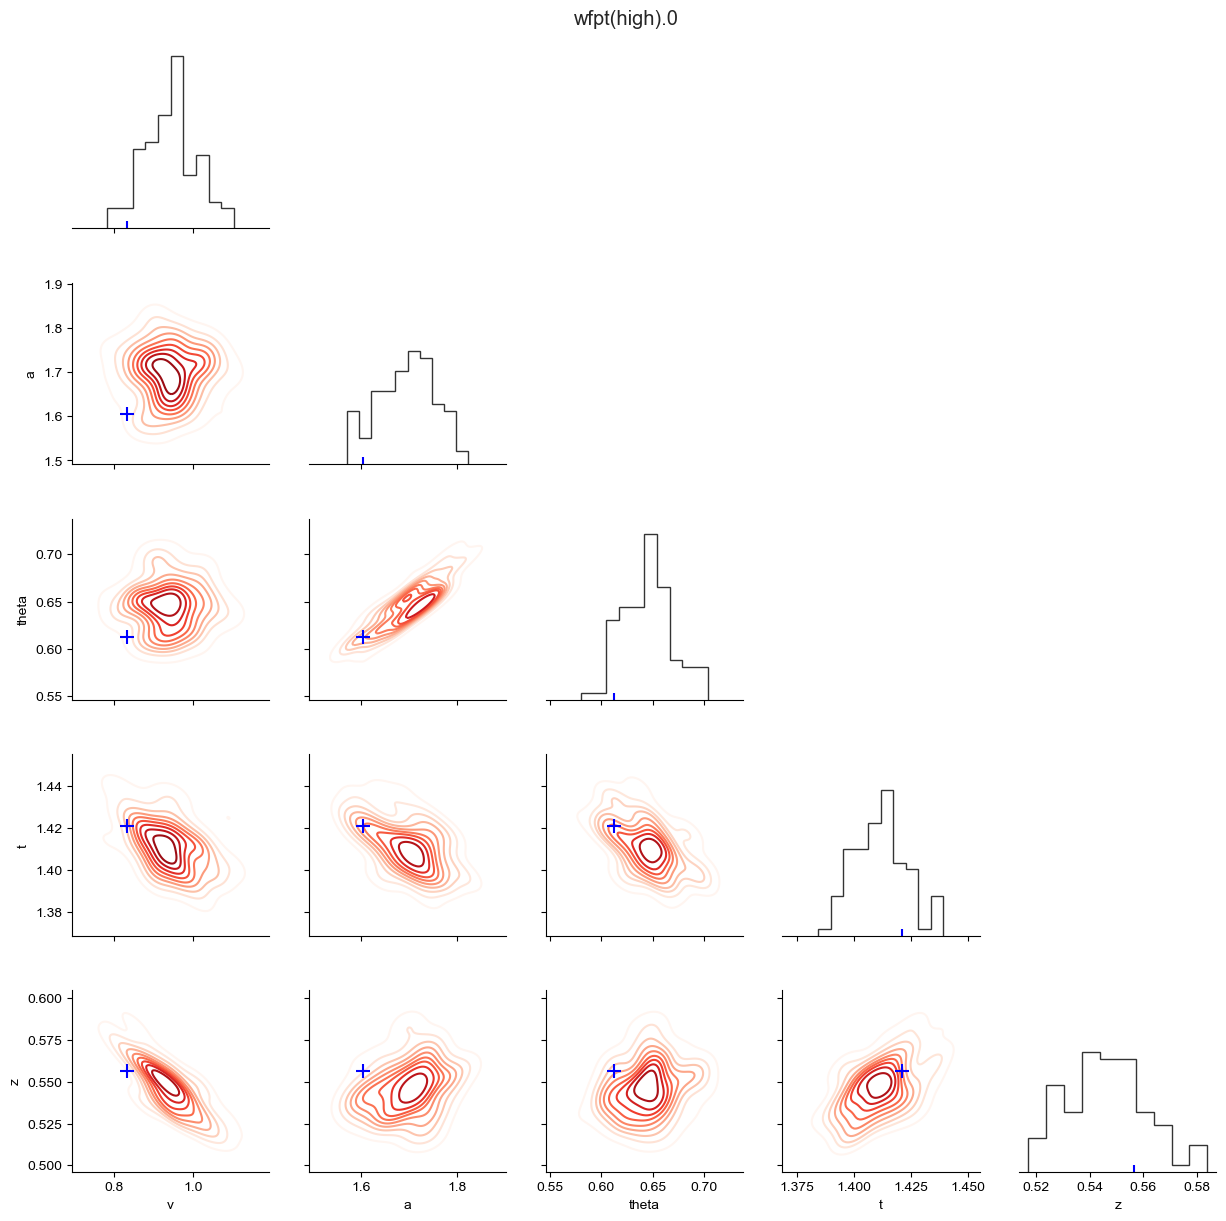

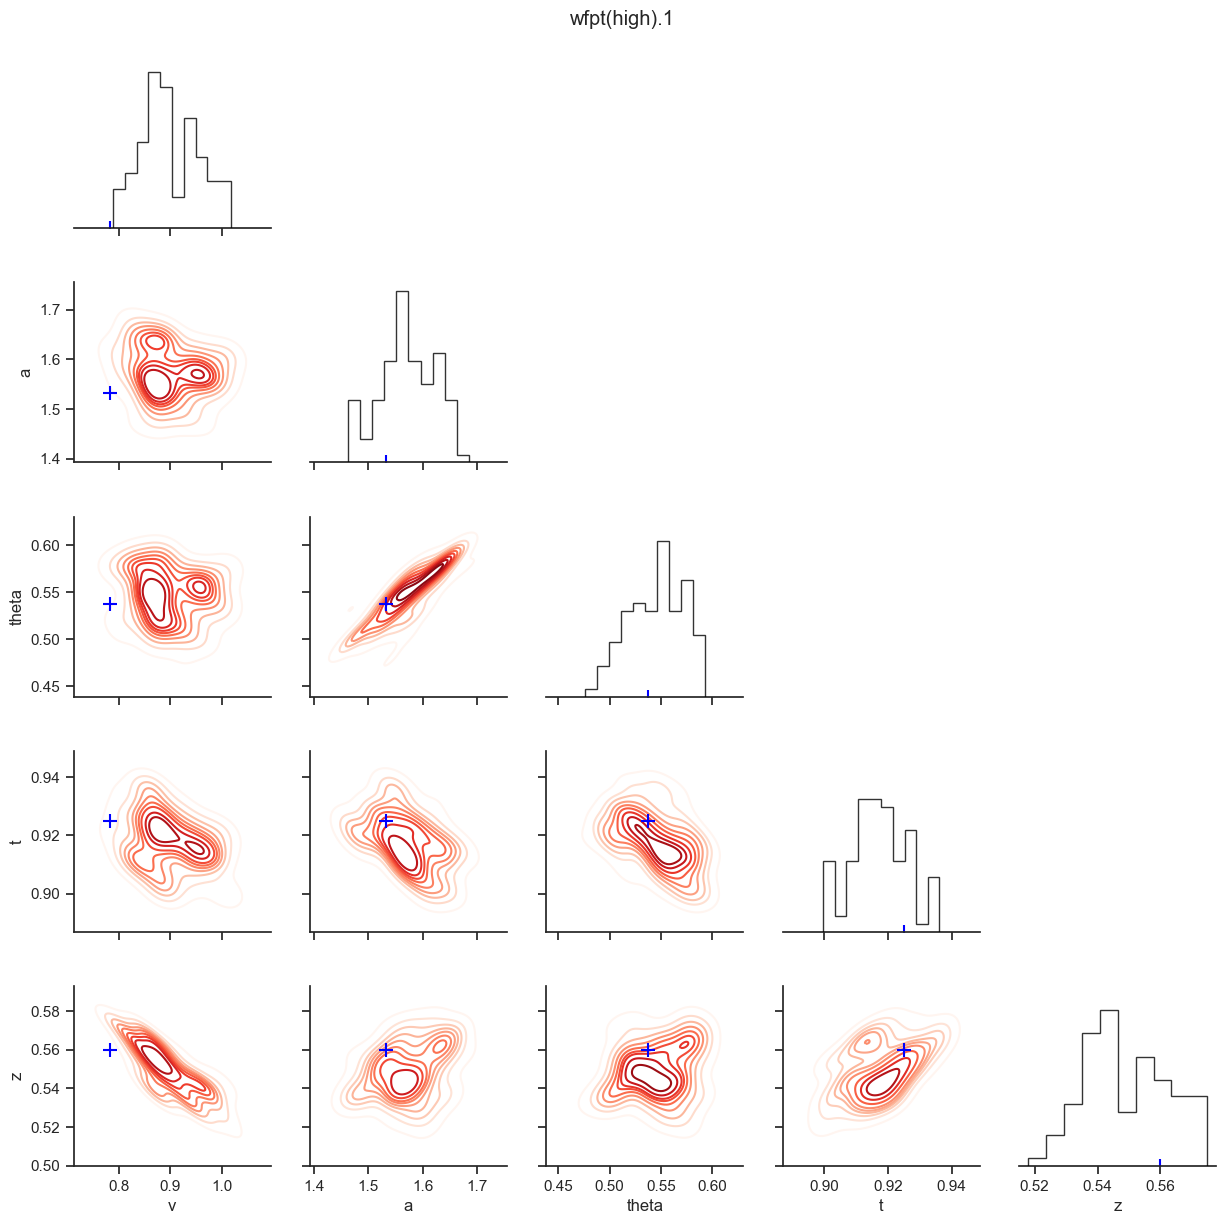

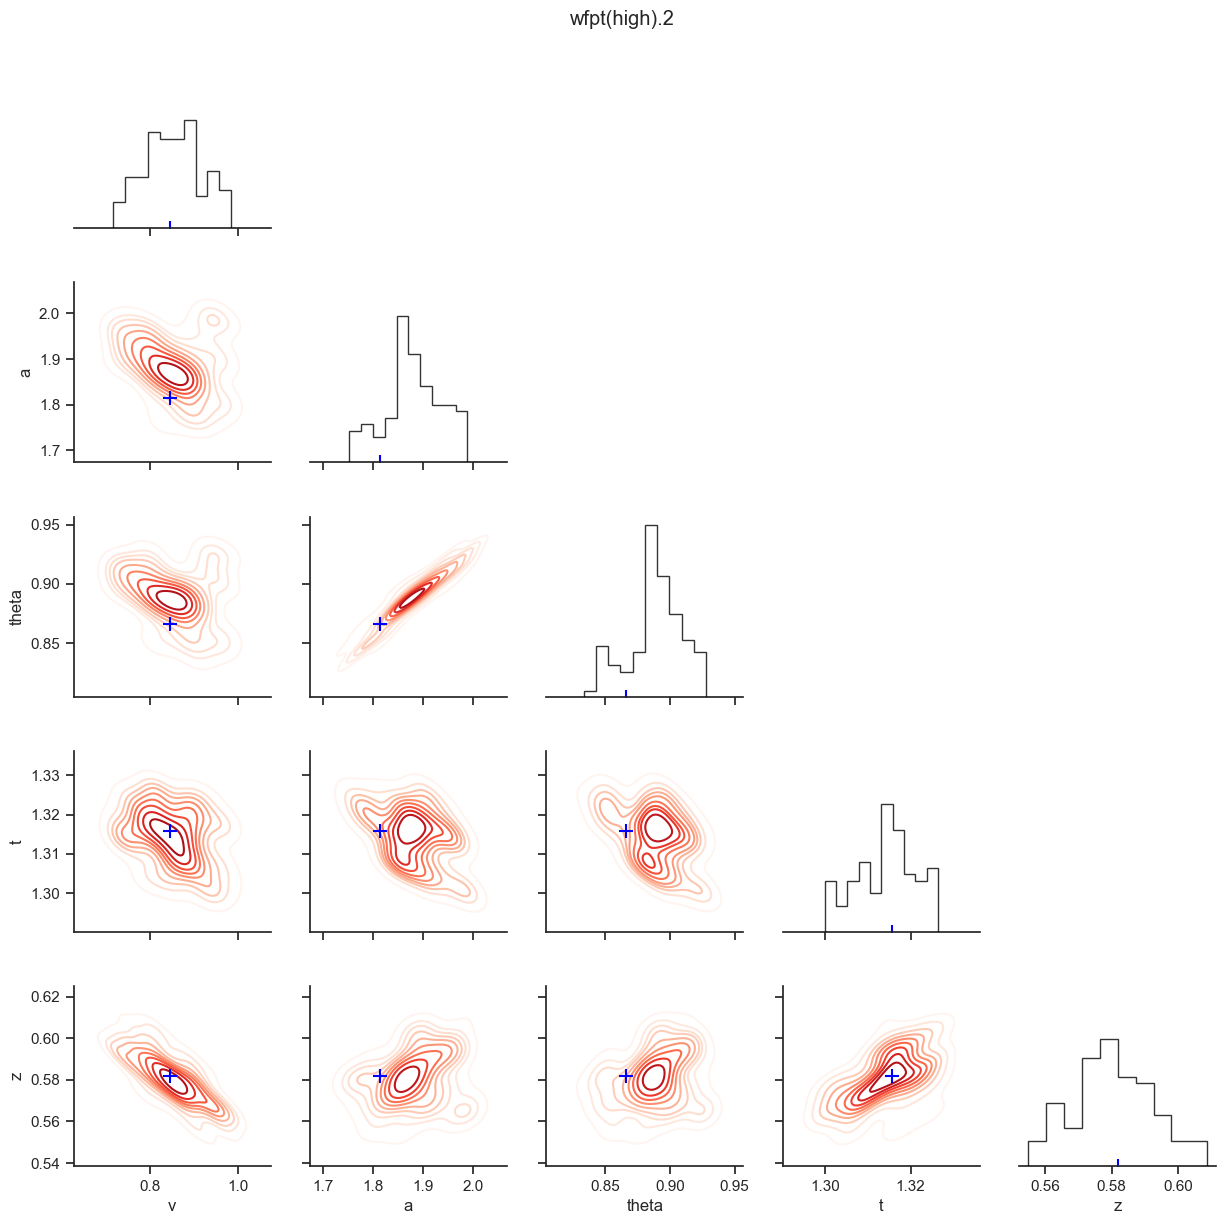

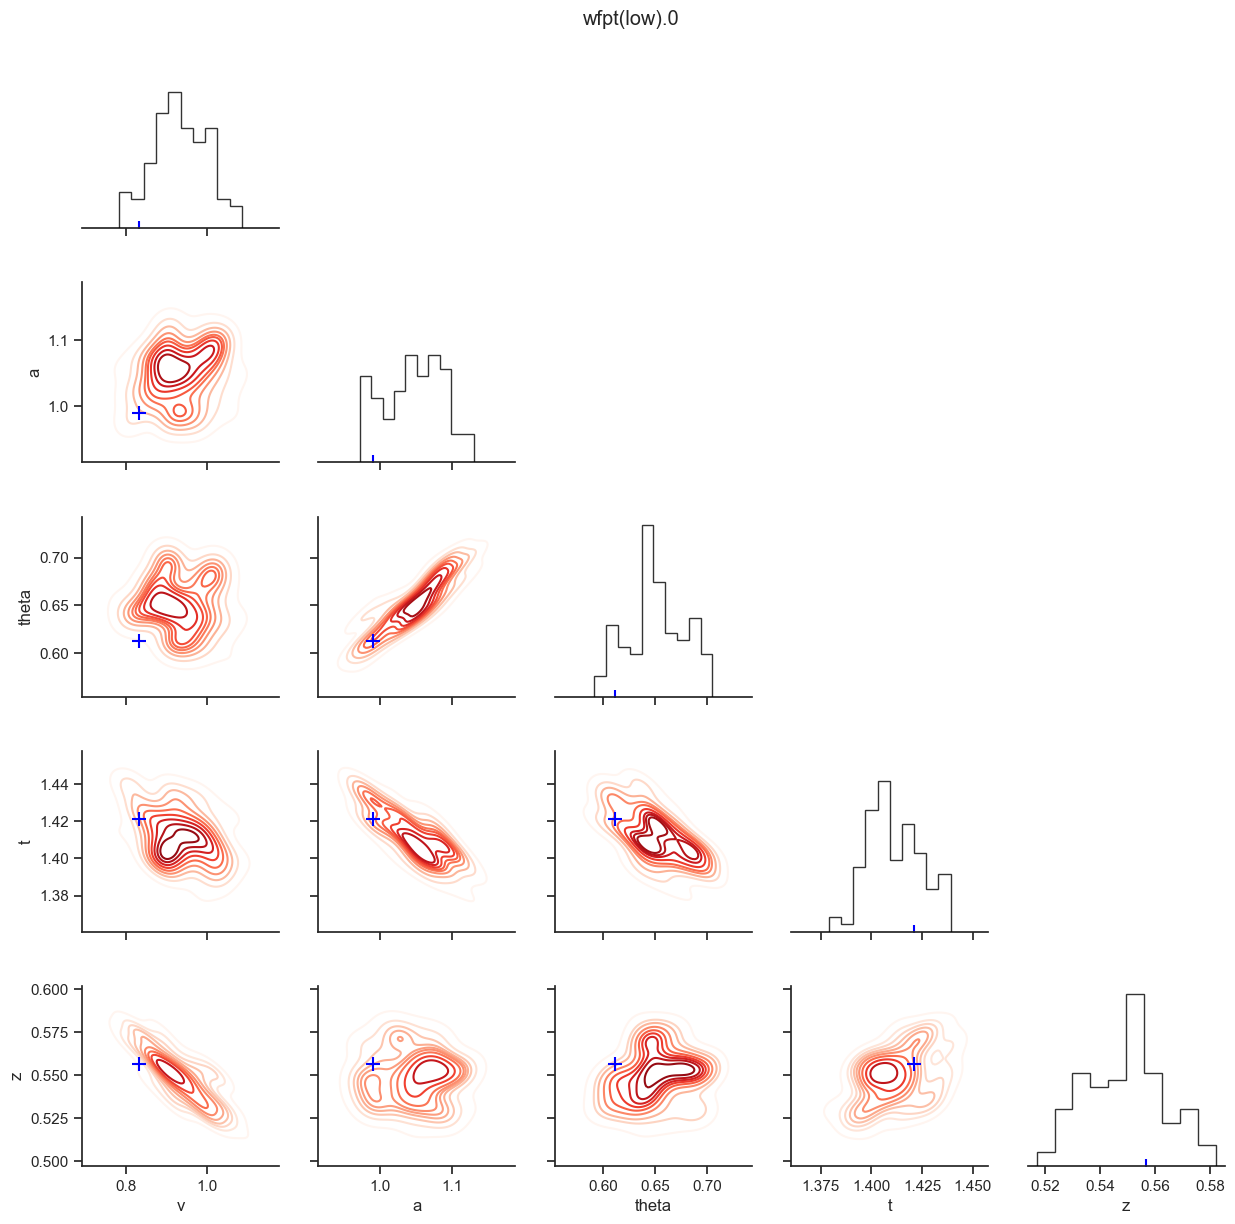

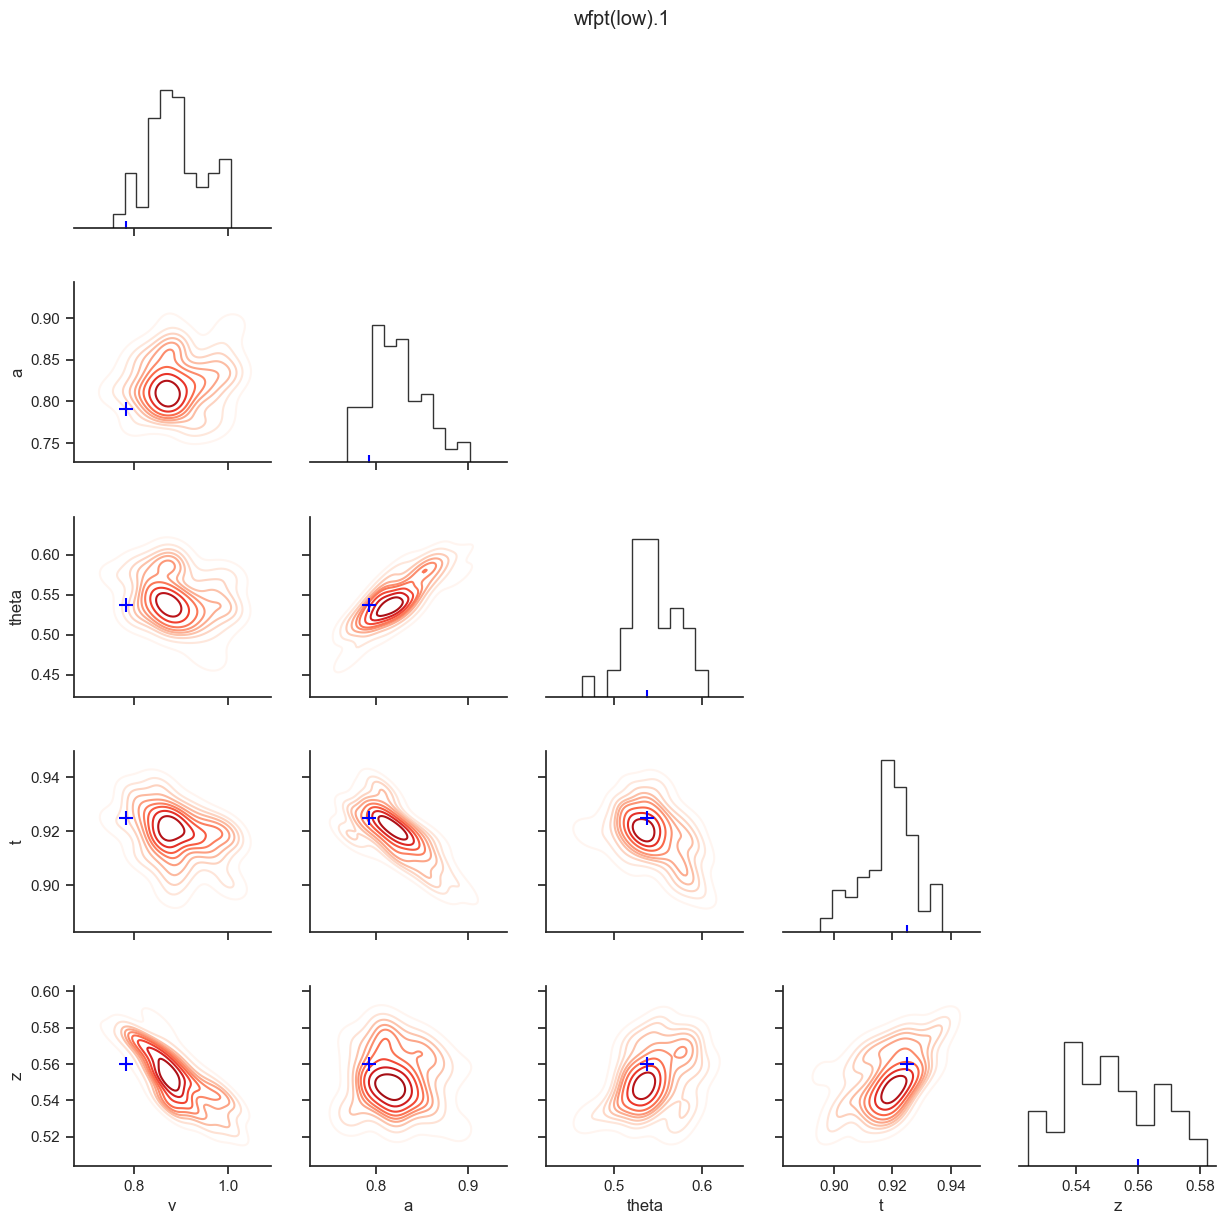

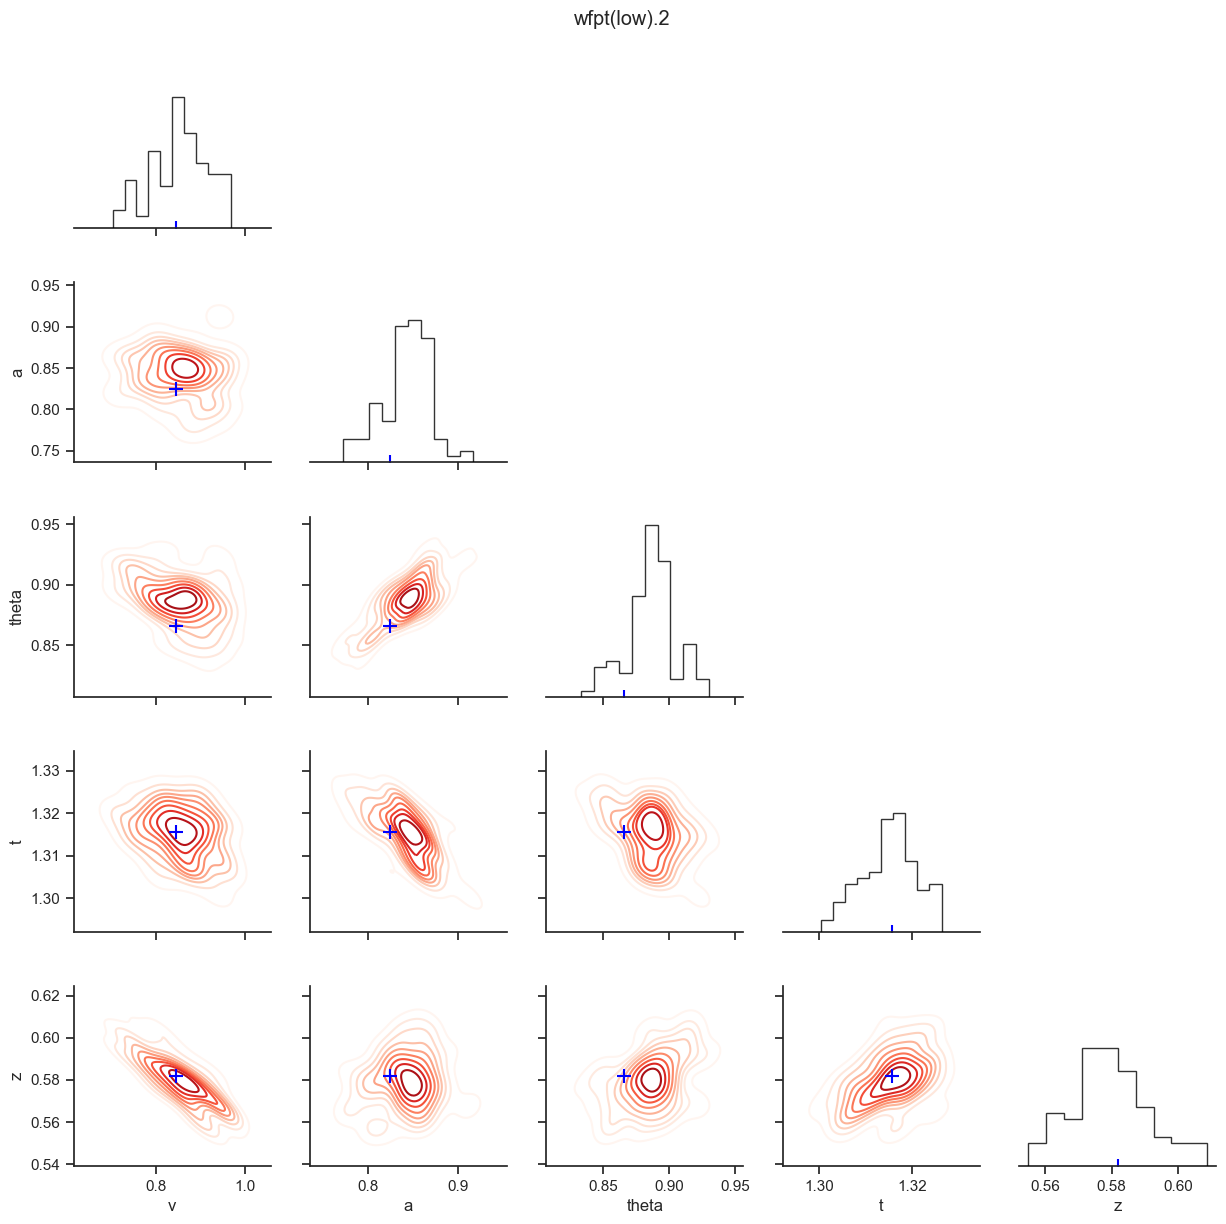

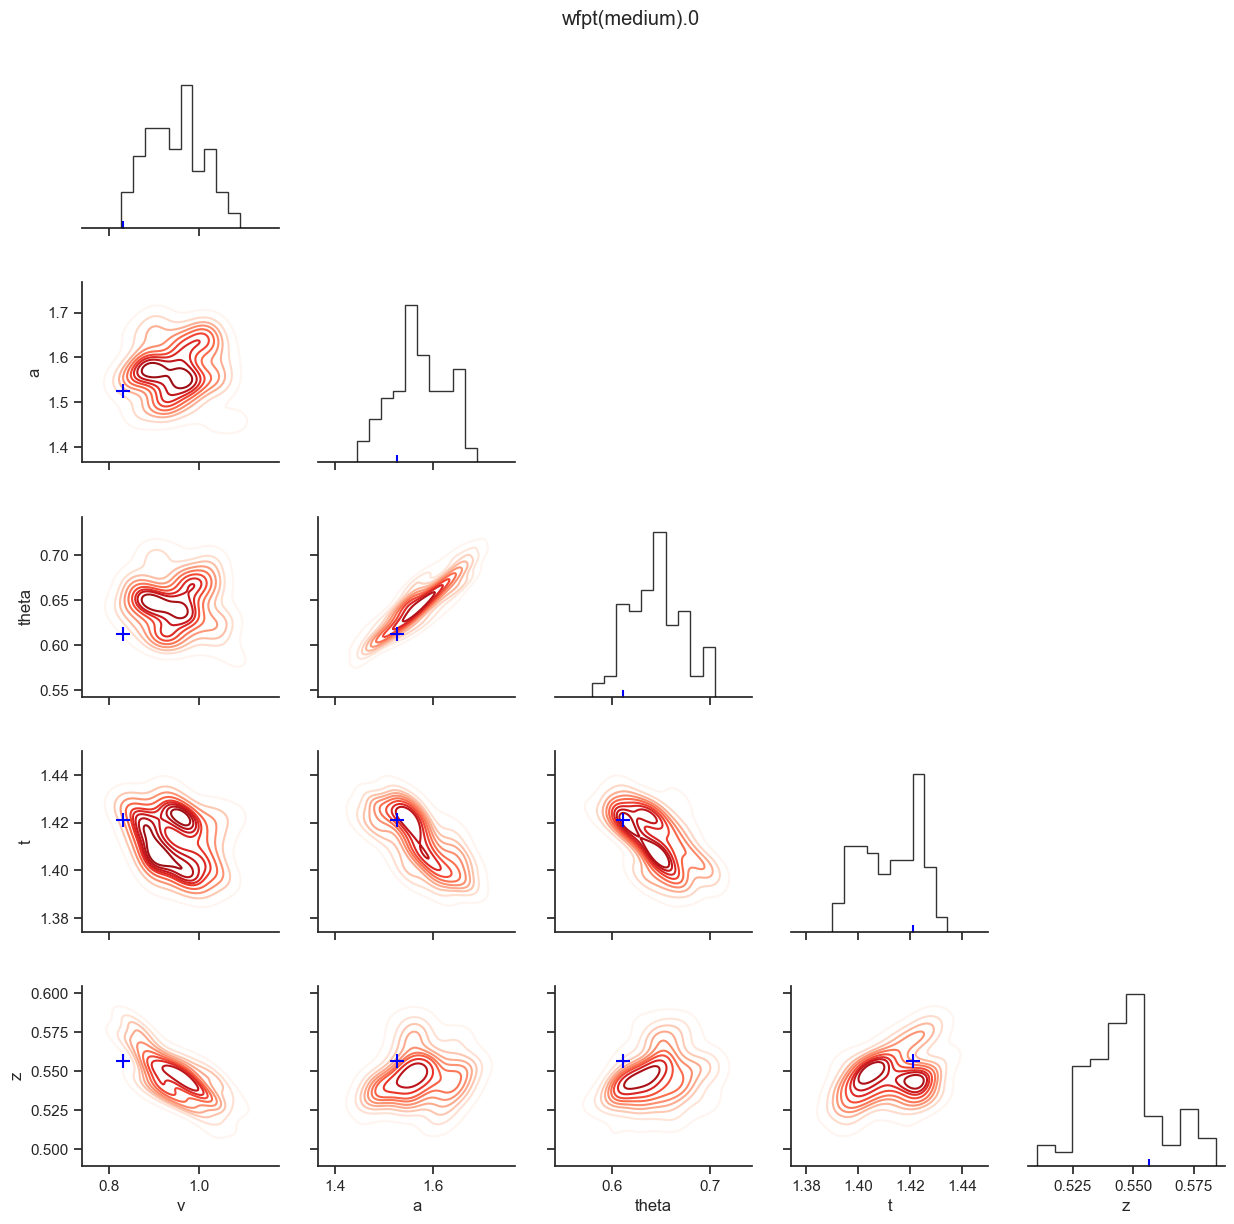

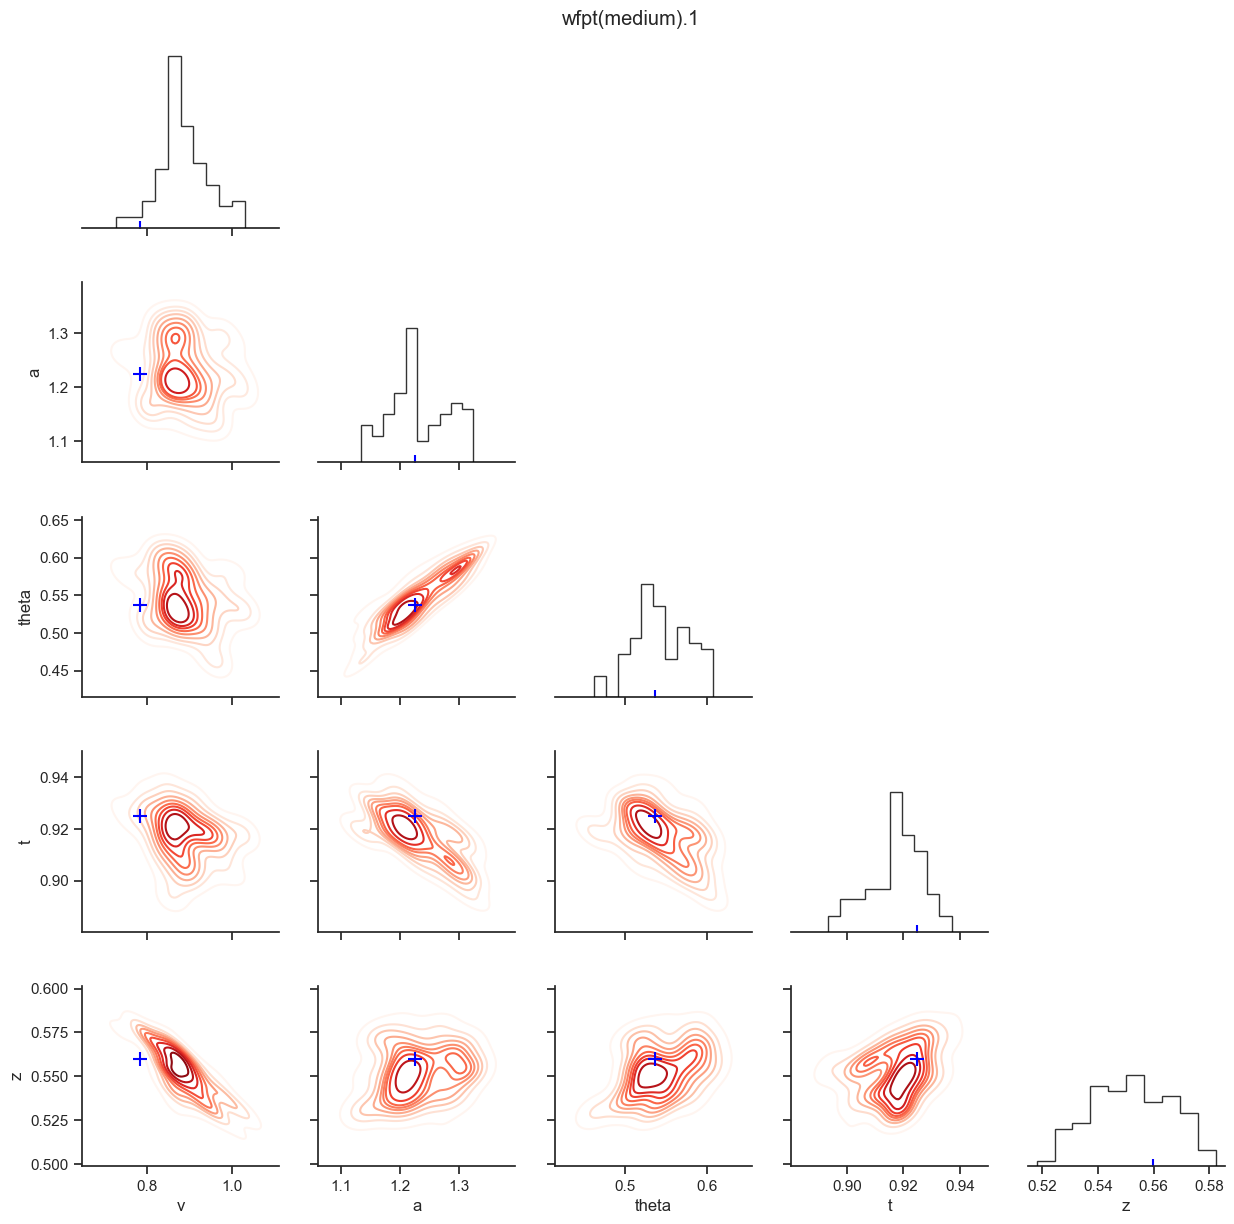

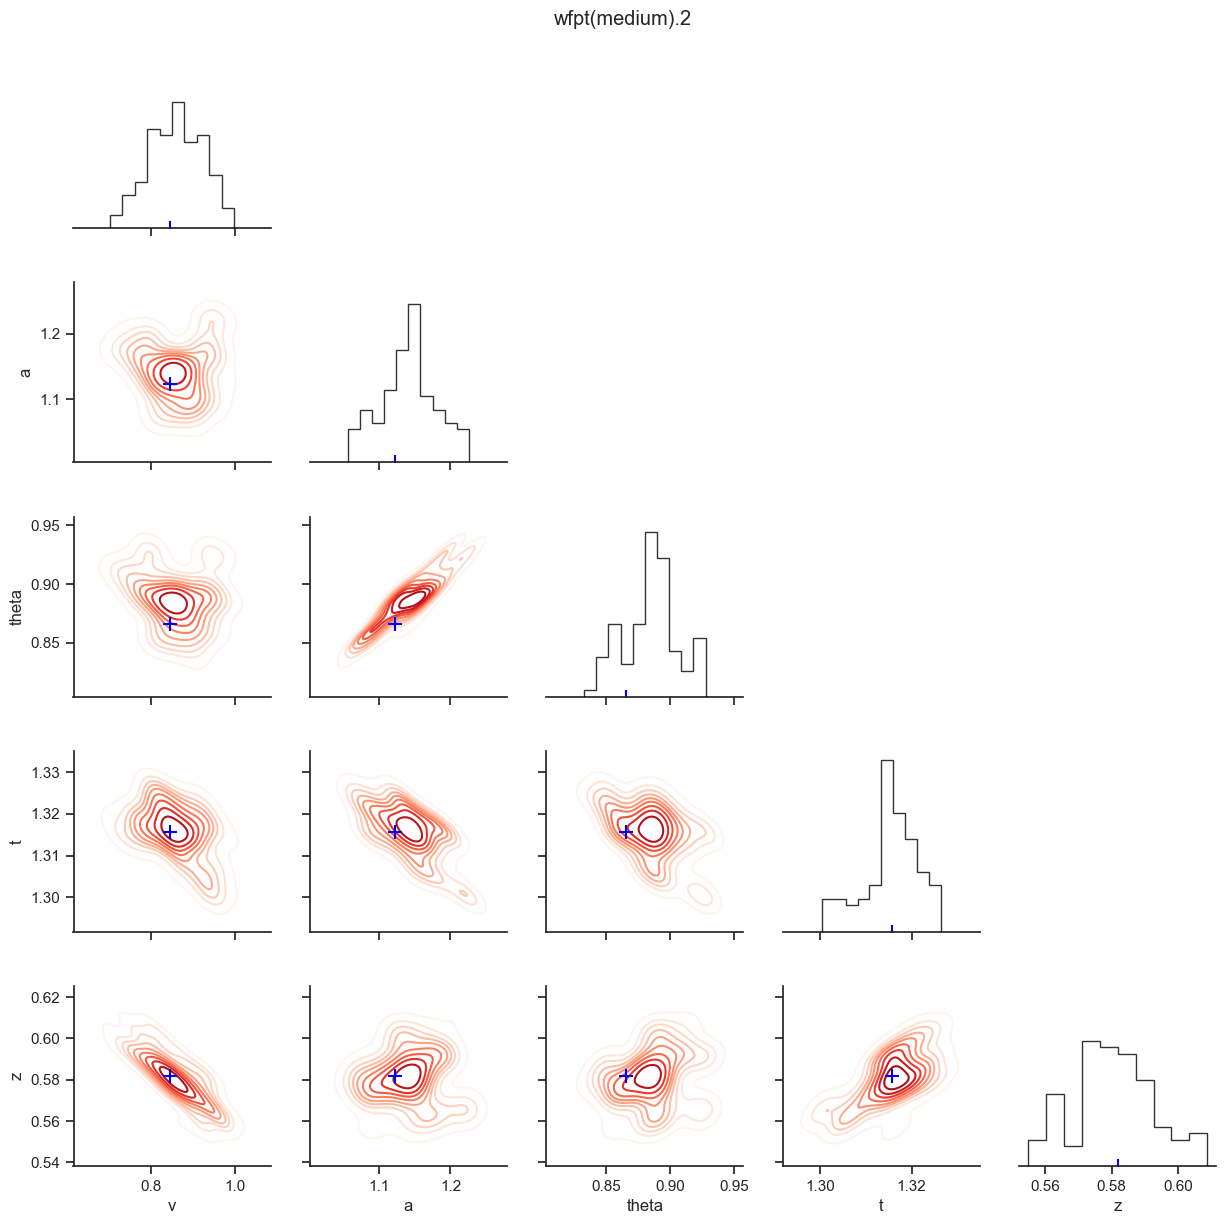

In [7]:
from hddm.plotting_dev import _plot_func_pair
plotting_dev.plot_posterior_pair(model = hddmnn_model, 
                                 plot_func = _plot_func_pair,
                                 parameter_recovery_mode = True,
                                 samples = 100,
                                 figsize = (10, 10))

In [24]:
from hddm.plotting_dev import _plot_func_posterior_node_from_sim

plotting_dev.plot_from_data(df = data, 
                            generative_model = 'angle',  
                            groupby = ['subj_idx'],
                            figsize = (8, 3),
                            value_range = np.arange(-5, 5, 0.1),
                            plot_func = _plot_func_model,
                            **{'alpha': 1.,
                               'ylim': 4})

subj_idx(0)
subj_idx(1)
subj_idx(2)


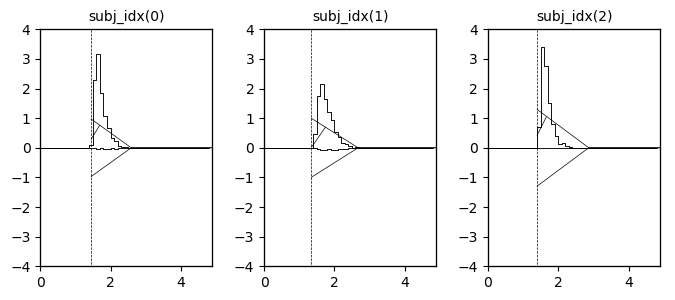

In [25]:
plt.show()